In [45]:
import pandas as pd
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from scipy.stats import shapiro
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
from sklearn.preprocessing import StandardScaler

# csv집어 넣는 폴더 하나로 통일시켜서 이름좀 같게 만들자

In [46]:
df = pd.read_csv('../../dataset/윈저데이터셋.csv', encoding='CP949')
df.columns

Index(['회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '산업명', '소속코드', '[제조]매출액증가율',
       '[제조]유형자산증가율', '[제조]비유동자산증가율', '[제조]총자본증가율', '[제조]자기자본증가율',
       '[제조]유동자산증가율', '[제조]순이익증가율', '[제조]재고자산증가율', '[제조]매출액총이익률',
       '[제조]매출액순이익률', '[제조]총자본사업이익률', '[제조]총자본순이익률', '[제조]자기자본순이익률',
       '[제조]1주당순이익', '[제조]1주당매출액', '[제조]총자본회전률', '[제조]자기자본회전률', '[제조]비유동자산회전률',
       '[제조]재고자산회전률', '[제조]매출채권회전률', '[제조]매입채무회전률', '[제조]매입채무회전기간',
       '[제조]재고자산회전기간', '[제조]매출채권회전기간', '[제조]1회전기간', '[제조]운전자본회전률',
       '[제조]순운전자본회전률', '[제조]유동자산회전률', '[제조]당좌자산회전률', '[제조]유동비율', '[제조]당좌비율',
       '[제조]현금비율', '[제조]부채비율', '[제조]순운전자본비율', '[제조]자기자본배율', '[제조]비유동비율',
       '[제조]유동자산구성비율', '[제조]자기자본구성비율', '[제조]부가가치', '[제조]총자본투자효율', '[제조]설비투자효율',
       '[제조]기계투자효율', '[제조]부가가치율', '[제조]노동소득분배율', '[제조]자본분배율', '[제조]이윤분배율',
       '[제조]유형자산회전율', '[제조]이자보상배율(이자비용)', 'year', 'month', 'label'],
      dtype='object')

In [65]:
df_1 = df[['[제조]매출액증가율',
       '[제조]유형자산증가율', '[제조]비유동자산증가율', '[제조]총자본증가율', '[제조]자기자본증가율',
       '[제조]유동자산증가율', '[제조]순이익증가율', '[제조]재고자산증가율', '[제조]매출액총이익률',
       '[제조]매출액순이익률', '[제조]총자본사업이익률', '[제조]총자본순이익률', '[제조]자기자본순이익률',
       '[제조]1주당순이익', '[제조]1주당매출액', '[제조]총자본회전률', '[제조]자기자본회전률', '[제조]비유동자산회전률',
       '[제조]재고자산회전률', '[제조]매출채권회전률', '[제조]매입채무회전률', '[제조]매입채무회전기간',
       '[제조]재고자산회전기간', '[제조]매출채권회전기간', '[제조]1회전기간', '[제조]운전자본회전률',
       '[제조]순운전자본회전률', '[제조]유동자산회전률', '[제조]당좌자산회전률', '[제조]유동비율', '[제조]당좌비율',
       '[제조]현금비율', '[제조]부채비율', '[제조]순운전자본비율', '[제조]자기자본배율', '[제조]비유동비율',
       '[제조]유동자산구성비율', '[제조]자기자본구성비율', '[제조]부가가치', '[제조]총자본투자효율', '[제조]설비투자효율',
       '[제조]기계투자효율', '[제조]부가가치율', '[제조]노동소득분배율', '[제조]자본분배율', '[제조]이윤분배율',
       '[제조]유형자산회전율', '[제조]이자보상배율(이자비용)']]

### 윈저라이징

# MDA

## Bartlett 검정

In [66]:
scaler = StandardScaler()
scaler.fit(df_1)

df_scaled = scaler.transform(df_1)

df_scaled_df = pd.DataFrame(df_scaled,columns = df_1.columns)

In [67]:
Bad = df[df['label']== 1] #Existing Customer
Good = df[df['label']== 0] #Attrited Customer

### F-test 검정

In [68]:
a = []
for i in df_scaled_df:
    # print(i)
    # lresult = stats.levene(close[i], normal[i])
    lresult = stats.bartlett(Bad[i], Good[i])
    
    # print('LeveneResult(F) : %.3f \np-value : %.3f' % (lresult))

    # result = stats.ttest_ind(close[i], normal[i], equal_var=False) #등분산
    # print('t statistic : %.3f \np-value : %.3f' % (result))
    # a.append([i,lresult[-1],result[-1]])
    a.append([i,lresult[-1]])

In [69]:
pd.options.display.float_format = '{:.10f}'.format

In [70]:
a= pd.DataFrame(a)
a.columns=["피처값",'F-test']
a


,피처값,F-test
0,[제조]매출액증가율,0.0000000002
1,[제조]유형자산증가율,0.0001715646
2,[제조]비유동자산증가율,0.0000066002
3,[제조]총자본증가율,0.0000000036
4,[제조]자기자본증가율,0.0000000000
5,[제조]유동자산증가율,0.0000000000
6,[제조]순이익증가율,0.0429537408
7,[제조]재고자산증가율,0.0071831459
8,[제조]매출액총이익률,0.0167184441
9,[제조]매출액순이익률,0.0000000000


### 등분산과 이분산 구분

In [71]:
a["분산"] =''
a["T-test"] =""
for i in a.index:
    if a.loc[i,"F-test"]>=0.05:
        a.loc[i,"분산"] = "homo"
    else:
        a.loc[i,"분산"] = "hetero"
a

,피처값,F-test,분산,T-test
0,[제조]매출액증가율,0.0000000002,hetero,
1,[제조]유형자산증가율,0.0001715646,hetero,
2,[제조]비유동자산증가율,0.0000066002,hetero,
3,[제조]총자본증가율,0.0000000036,hetero,
4,[제조]자기자본증가율,0.0000000000,hetero,
5,[제조]유동자산증가율,0.0000000000,hetero,
6,[제조]순이익증가율,0.0429537408,hetero,
7,[제조]재고자산증가율,0.0071831459,hetero,
8,[제조]매출액총이익률,0.0167184441,hetero,
9,[제조]매출액순이익률,0.0000000000,hetero,


### 등분산 이분산 T-test
- 등분산일시 T-test
- 이분산일시 Welch T-test

In [72]:
a["분산"] =''
a["T-test"] =""
for i in a.index:
    if a.loc[i,"F-test"]>=0.05:
        a.loc[i,"분산"] = "homo"
        result = stats.ttest_ind(Bad[a.loc[i,"피처값"]], Good[a.loc[i,"피처값"]], equal_var=True)       ## equal_var = True Student T-test
        a.loc[i,"T-test"] = result[-1]
    else:
        a.loc[i,"분산"] = "hetero"
        result = stats.ttest_ind(Bad[a.loc[i,"피처값"]], Good[a.loc[i,"피처값"]], equal_var=False)      ## equal_var = False Welchs T-Test
        a.loc[i,"T-test"] = result[-1]
a


,피처값,F-test,분산,T-test
0,[제조]매출액증가율,0.0000000002,hetero,0.0000000002
1,[제조]유형자산증가율,0.0001715646,hetero,0.0000000360
2,[제조]비유동자산증가율,0.0000066002,hetero,0.0000000000
3,[제조]총자본증가율,0.0000000036,hetero,0.0000000000
4,[제조]자기자본증가율,0.0000000000,hetero,0.0000000071
5,[제조]유동자산증가율,0.0000000000,hetero,0.0000000003
6,[제조]순이익증가율,0.0429537408,hetero,0.1325560371
7,[제조]재고자산증가율,0.0071831459,hetero,0.0000000000
8,[제조]매출액총이익률,0.0167184441,hetero,0.0000002221
9,[제조]매출액순이익률,0.0000000000,hetero,0.0000000000


In [73]:
# bartlett2 =a[a["T-test"]>=0.05]
bartlett2 = a[a["분산"]=="homo"]
bartlett2 = pd.DataFrame(bartlett2)
# bartlett2=bartlett2.sort_values(['T-test'],ascending=True)
# bartlett2 = bartlett2.loc[[1,2,3,5,7,10,11,14,15,21,26,30,33,35,37]]
bartlett2= bartlett2.sort_values(["T-test"], ascending=True)

bartlett2 = bartlett2.reset_index()
bartlett2
# bartlett2 =pd.DataFrame(bartlett2)

,index,피처값,F-test,분산,T-test
0,33,[제조]순운전자본비율,0.6905051892,homo,0.0000000000
1,37,[제조]자기자본구성비율,0.2141673523,homo,0.0000000000
2,26,[제조]순운전자본회전률,0.0780302861,homo,0.0000000000
3,44,[제조]자본분배율,0.6228663731,homo,0.0000000000
4,15,[제조]총자본회전률,0.1496440758,homo,0.0000000000
5,45,[제조]이윤분배율,0.8648417054,homo,0.0000000381
6,40,[제조]설비투자효율,0.5946428869,homo,0.0000000469
7,27,[제조]유동자산회전률,0.2576052324,homo,0.0000001632
8,28,[제조]당좌자산회전률,0.1575008597,homo,0.0000002846
9,36,[제조]유동자산구성비율,0.1303727335,homo,0.0000256700


In [76]:
homo = bartlett2['피처값'].tolist()
homo

['[제조]순운전자본비율',
 '[제조]자기자본구성비율',
 '[제조]순운전자본회전률',
 '[제조]자본분배율',
 '[제조]총자본회전률',
 '[제조]이윤분배율',
 '[제조]설비투자효율',
 '[제조]유동자산회전률',
 '[제조]당좌자산회전률',
 '[제조]유동자산구성비율',
 '[제조]재고자산회전률',
 '[제조]유형자산회전율']

In [90]:
df_LR_feature= df_scaled_df[['[제조]순운전자본비율',
 '[제조]자기자본구성비율',
 '[제조]순운전자본회전률',
 '[제조]자본분배율',
 '[제조]총자본회전률',
 '[제조]이윤분배율',
 '[제조]설비투자효율',
 '[제조]당좌자산회전률',
 '[제조]유동자산구성비율',
 '[제조]재고자산회전률']]
df_LR_feature

,[제조]순운전자본비율,[제조]자기자본구성비율,[제조]순운전자본회전률,[제조]자본분배율,[제조]총자본회전률,[제조]이윤분배율,[제조]설비투자효율,[제조]당좌자산회전률,[제조]유동자산구성비율,[제조]재고자산회전률
0,0.2287257371,0.2991482378,-0.2891603252,-0.4239043362,-0.3724680511,-0.6203263125,-0.3425183063,-0.5154123746,0.1865651490,-0.3712552686
1,1.8822634531,-0.2329679616,-1.2051982201,-2.8976175697,-0.9872359213,-2.5850211824,-0.4120110987,-1.2108092615,1.6336176010,-0.3850806819
2,1.4100471122,1.3693316099,-1.2051982201,0.0610041365,-1.0555434625,0.0589875661,-0.2538870683,-1.2462886945,0.8553662823,-0.3913118542
3,0.4429792670,1.2086553297,-0.9137316172,-0.1487567023,-0.9644667410,0.0306293824,-0.3384292552,-1.0476038697,-0.2226355444,-0.4033847504
4,0.3298034497,1.1298049330,-0.5181697989,-1.8435824321,-0.8050824783,-1.2065854475,-0.3670736910,-0.7495766324,-0.3474857559,-0.3946221644
...,...,...,...,...,...,...,...,...,...,...
10647,-0.3207623687,1.3584214921,2.1466677137,0.6677935954,2.2004493315,0.4424643120,-0.3793619221,2.3300381526,-1.8753883449,0.8465494546
10648,-0.5342353757,1.3524705188,2.1466677137,0.6795632185,2.2004493315,0.4296390028,-0.3800785599,2.3300381526,-1.8104882350,0.6518253224
10649,-0.4206692970,1.6688639346,2.1466677137,0.6837479734,2.2004493315,0.4567146556,-0.3768747672,2.3300381526,-1.9881385360,1.0293954148
10650,-0.0350909955,1.5880298801,2.1466677137,1.3449392458,2.2004493315,0.7827625168,-0.3274899894,2.3300381526,-1.4161375667,0.8358396274


In [91]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(df_LR_feature)
# vif 와 비교하여서 변수 제거 

,VIF Factor,features
0,12.5925992019,[제조]순운전자본비율
1,12.0217595649,[제조]총자본회전률
2,11.6730190291,[제조]순운전자본회전률
3,9.7982438721,[제조]유동자산구성비율
4,5.4592031664,[제조]자기자본구성비율
5,4.9638229996,[제조]당좌자산회전률
6,1.9457421009,[제조]자본분배율
7,1.8451526823,[제조]이윤분배율
8,1.1651944671,[제조]설비투자효율
9,1.0959595410,[제조]재고자산회전률


# HOMO 포기


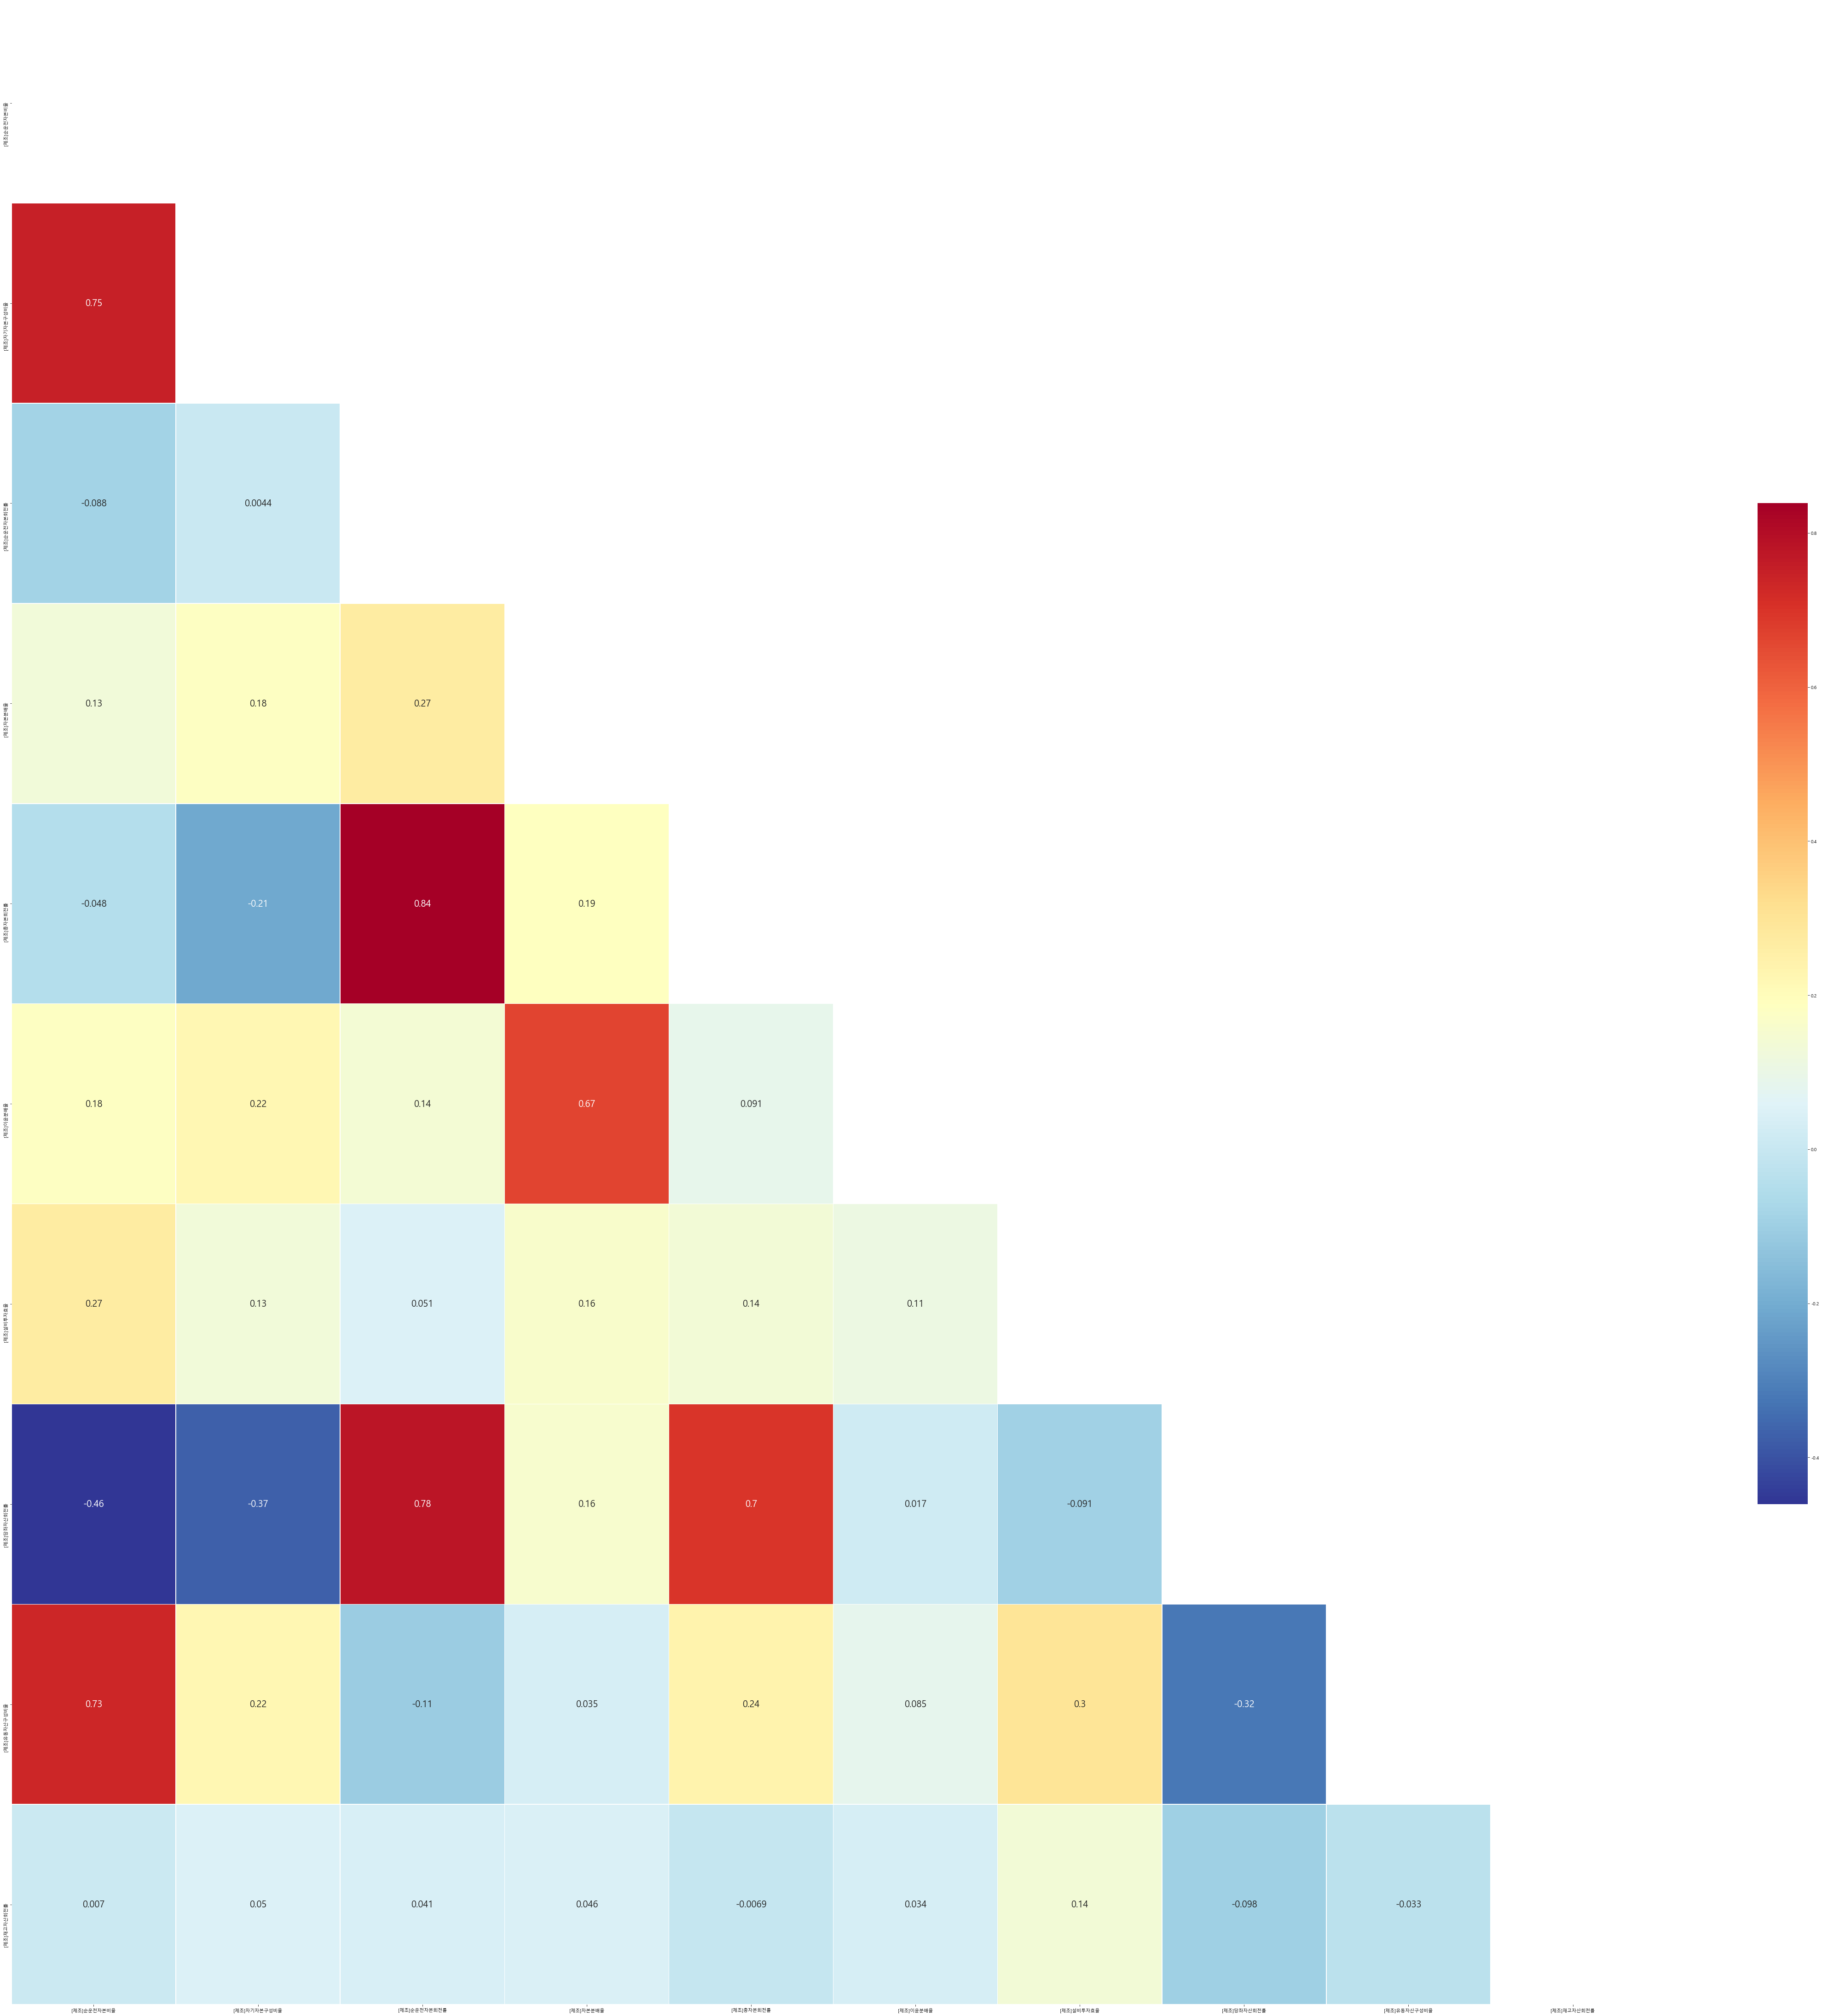

In [87]:
import numpy as np
def corr_heatmap(dataset, method_option = 'pearson'):

    
    # heatmap 그리기
    mask_ut=np.triu(np.ones(dataset.corr().shape)).astype(bool) 
    plt.figure(figsize=(80,80))
    sns.heatmap(dataset.corr(method=method_option), annot = True, cmap = 'RdYlBu_r', cbar_kws={"shrink": .5}, 
                annot_kws={"size": 20}, linewidths=.5, mask=mask_ut)
    plt.show()

# 함수 사용
corr_heatmap(df_LR_feature)

In [74]:
hetero = a[a['분산']=='hetero']
hetero

,피처값,F-test,분산,T-test
0,[제조]매출액증가율,0.0000000002,hetero,0.0000000002
1,[제조]유형자산증가율,0.0001715646,hetero,0.0000000360
2,[제조]비유동자산증가율,0.0000066002,hetero,0.0000000000
3,[제조]총자본증가율,0.0000000036,hetero,0.0000000000
4,[제조]자기자본증가율,0.0000000000,hetero,0.0000000071
5,[제조]유동자산증가율,0.0000000000,hetero,0.0000000003
6,[제조]순이익증가율,0.0429537408,hetero,0.1325560371
7,[제조]재고자산증가율,0.0071831459,hetero,0.0000000000
8,[제조]매출액총이익률,0.0167184441,hetero,0.0000002221
9,[제조]매출액순이익률,0.0000000000,hetero,0.0000000000


In [75]:
hetero['피처값'].tolist()

['[제조]매출액증가율',
 '[제조]유형자산증가율',
 '[제조]비유동자산증가율',
 '[제조]총자본증가율',
 '[제조]자기자본증가율',
 '[제조]유동자산증가율',
 '[제조]순이익증가율',
 '[제조]재고자산증가율',
 '[제조]매출액총이익률',
 '[제조]매출액순이익률',
 '[제조]총자본사업이익률',
 '[제조]총자본순이익률',
 '[제조]자기자본순이익률',
 '[제조]1주당순이익',
 '[제조]1주당매출액',
 '[제조]자기자본회전률',
 '[제조]비유동자산회전률',
 '[제조]매출채권회전률',
 '[제조]매입채무회전률',
 '[제조]매입채무회전기간',
 '[제조]재고자산회전기간',
 '[제조]매출채권회전기간',
 '[제조]1회전기간',
 '[제조]운전자본회전률',
 '[제조]유동비율',
 '[제조]당좌비율',
 '[제조]현금비율',
 '[제조]부채비율',
 '[제조]자기자본배율',
 '[제조]비유동비율',
 '[제조]부가가치',
 '[제조]총자본투자효율',
 '[제조]기계투자효율',
 '[제조]부가가치율',
 '[제조]노동소득분배율',
 '[제조]이자보상배율(이자비용)']

In [77]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(homo)
# vif 와 비교하여서 변수 제거 

AttributeError: 'list' object has no attribute 'columns'

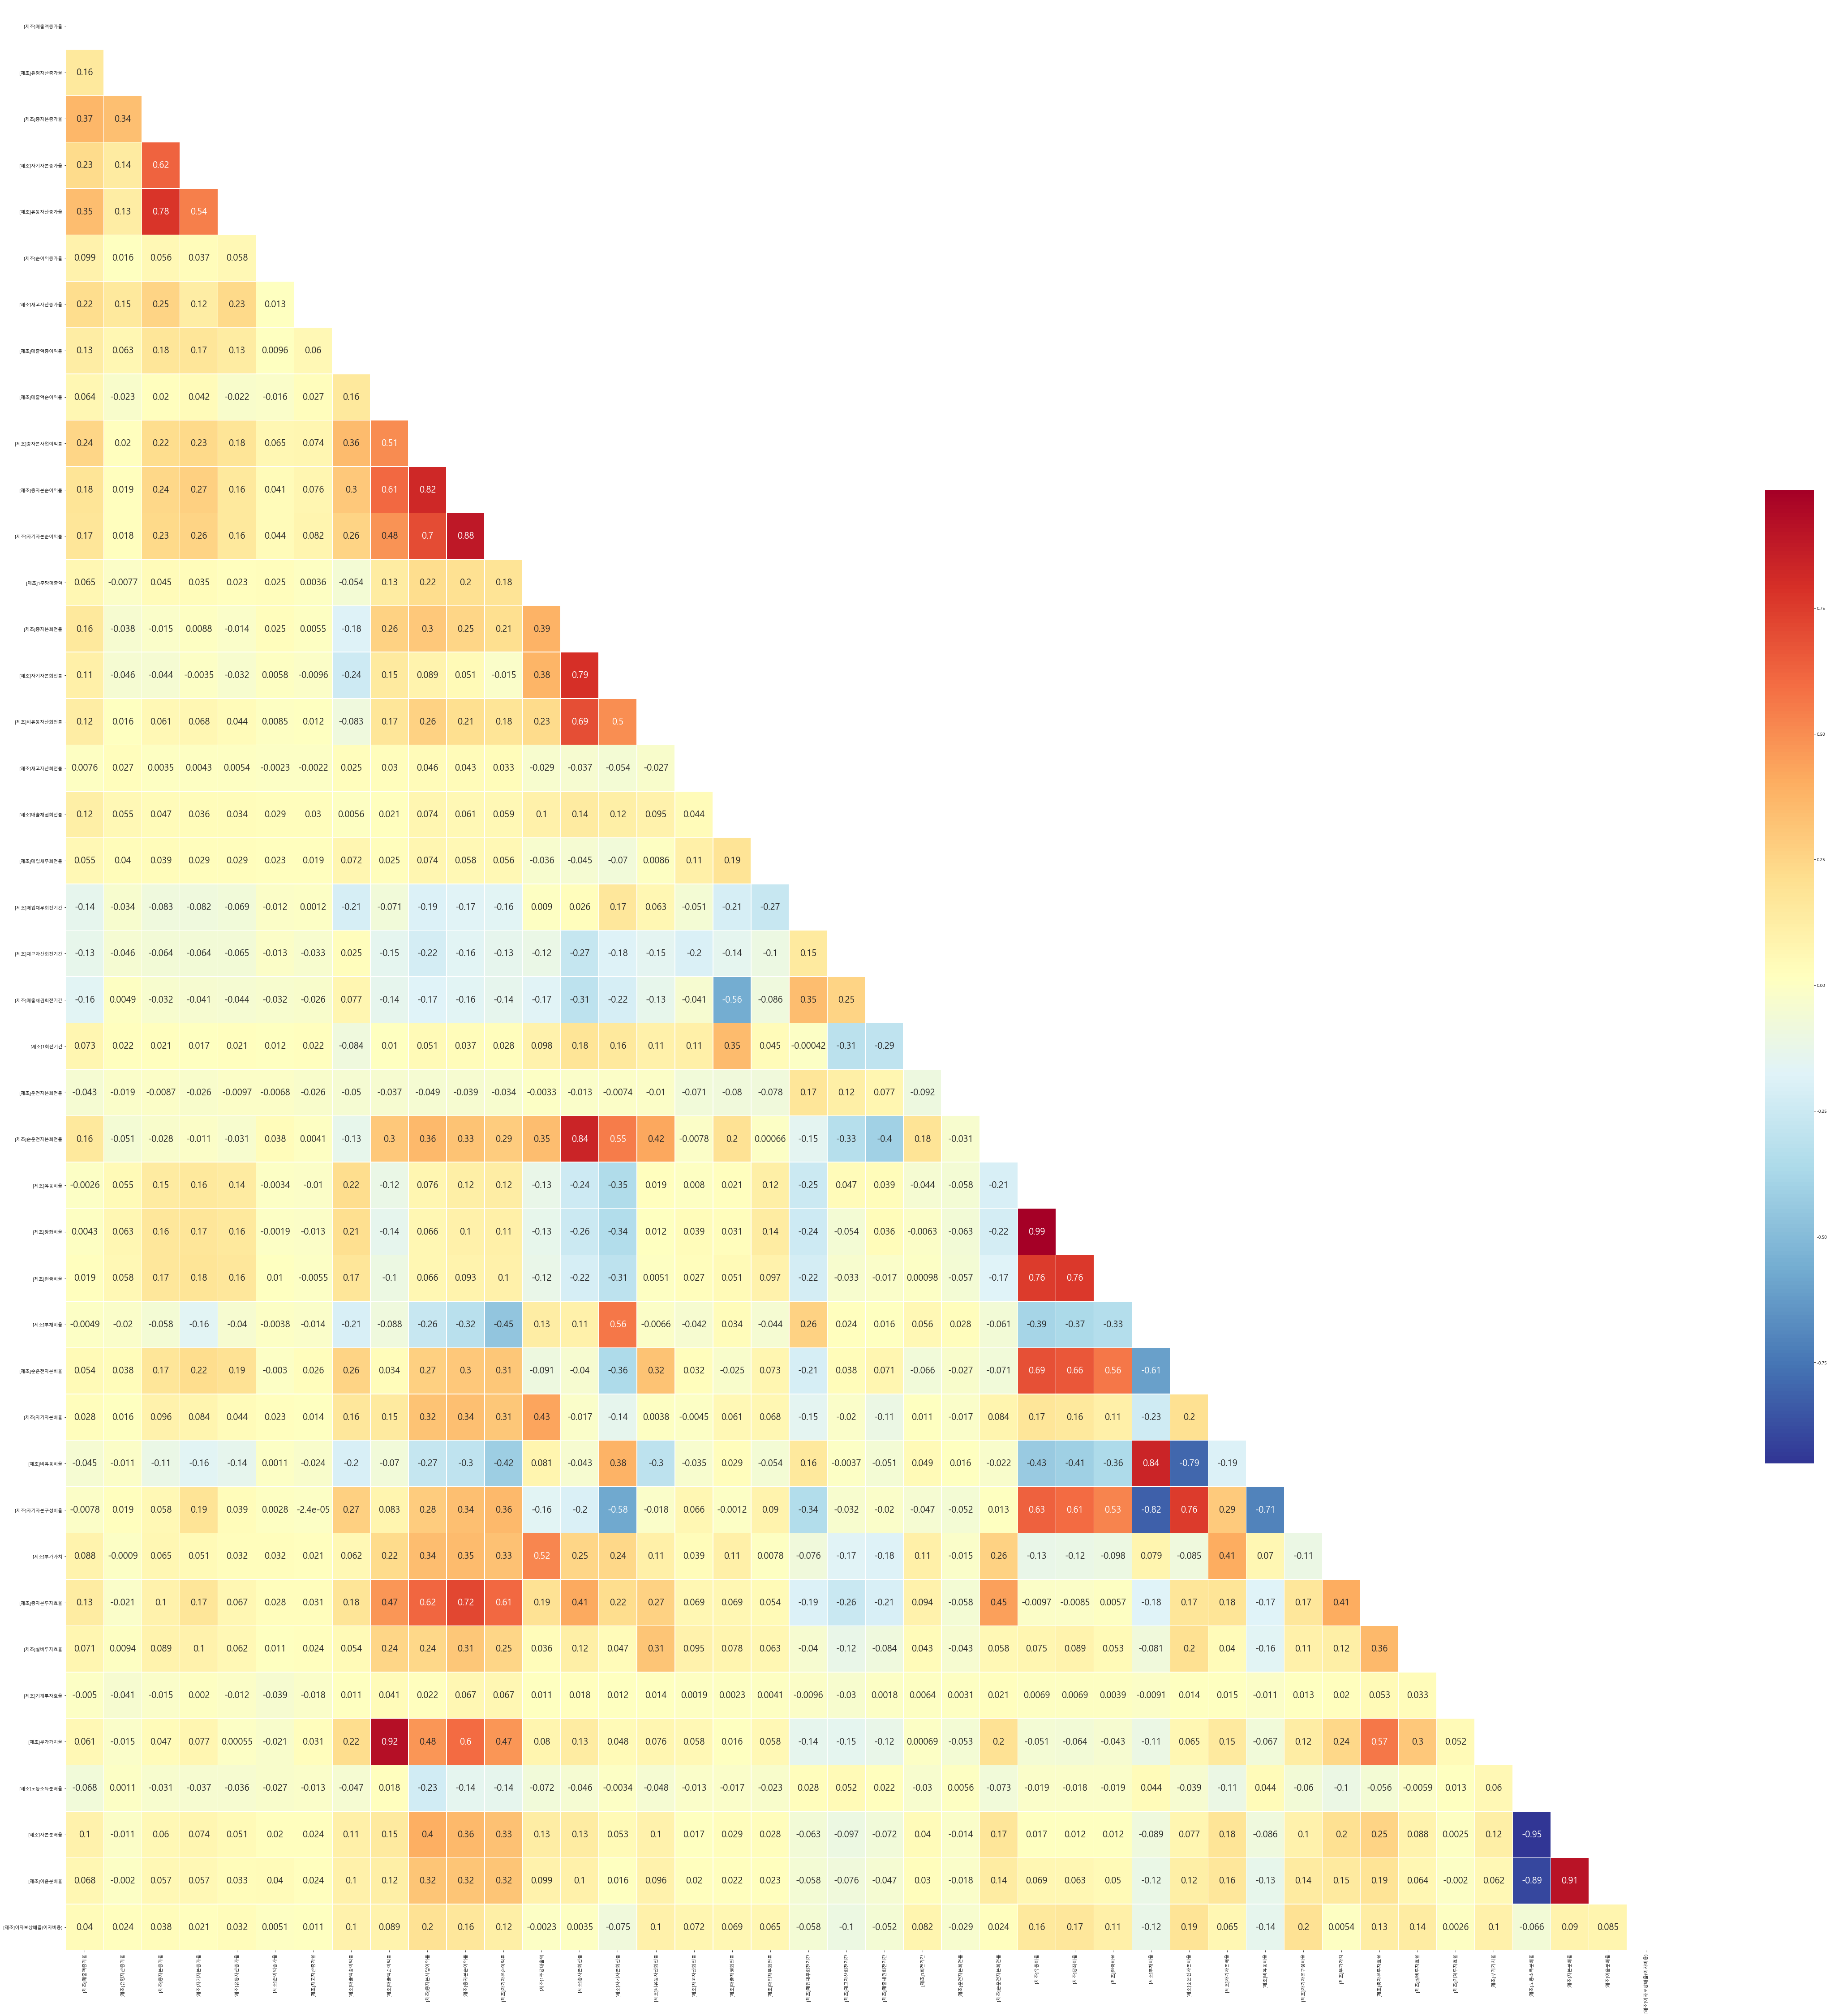

In [30]:
import numpy as np
def corr_heatmap(dataset, method_option = 'pearson'):

    
    # heatmap 그리기
    mask_ut=np.triu(np.ones(dataset.corr().shape)).astype(bool) 
    plt.figure(figsize=(80,80))
    sns.heatmap(dataset.corr(method=method_option), annot = True, cmap = 'RdYlBu_r', cbar_kws={"shrink": .5}, 
                annot_kws={"size": 20}, linewidths=.5, mask=mask_ut)
    plt.show()

# 함수 사용
corr_heatmap(feature)

### T-test 결과값이 0.05이하인 유의미한 피처 선정

In [92]:
bartlett =a[a["T-test"]<=0.05]
bartlett = bartlett[bartlett["분산"]=="hetero"]
bartlett = pd.DataFrame(bartlett)
# bartlett=bartlett.sort_values(['T-test'],ascending=True)
# bartlett = bartlett.loc[[1,2,3,5,7,10,11,14,15,21,26,30,33,35,37]]
bartlett= bartlett.sort_values(["T-test"], ascending=True)

bartlett = bartlett.reset_index()
bartlett
# bartlett =pd.DataFrame(bartlett)

,index,피처값,F-test,분산,T-test
0,34,[제조]자기자본배율,0.0000000000,hetero,0.0000000000
1,11,[제조]총자본순이익률,0.0000000000,hetero,0.0000000000
2,13,[제조]1주당순이익,0.0002819215,hetero,0.0000000000
3,10,[제조]총자본사업이익률,0.0000175222,hetero,0.0000000000
4,9,[제조]매출액순이익률,0.0000000000,hetero,0.0000000000
5,12,[제조]자기자본순이익률,0.0000000000,hetero,0.0000000000
6,38,[제조]부가가치,0.0000018115,hetero,0.0000000000
7,3,[제조]총자본증가율,0.0000000036,hetero,0.0000000000
8,39,[제조]총자본투자효율,0.0108671390,hetero,0.0000000000
9,31,[제조]현금비율,0.0000000000,hetero,0.0000000000


In [ ]:
bartlett['피처값']

In [93]:
bartlett['피처값'].tolist()

['[제조]자기자본배율',
 '[제조]총자본순이익률',
 '[제조]1주당순이익',
 '[제조]총자본사업이익률',
 '[제조]매출액순이익률',
 '[제조]자기자본순이익률',
 '[제조]부가가치',
 '[제조]총자본증가율',
 '[제조]총자본투자효율',
 '[제조]현금비율',
 '[제조]부가가치율',
 '[제조]유동비율',
 '[제조]1주당매출액',
 '[제조]당좌비율',
 '[제조]비유동자산증가율',
 '[제조]재고자산증가율',
 '[제조]매출액증가율',
 '[제조]비유동자산회전률',
 '[제조]유동자산증가율',
 '[제조]자기자본증가율',
 '[제조]매입채무회전기간',
 '[제조]유형자산증가율',
 '[제조]부채비율',
 '[제조]매출액총이익률',
 '[제조]비유동비율',
 '[제조]기계투자효율',
 '[제조]매입채무회전률',
 '[제조]노동소득분배율',
 '[제조]이자보상배율(이자비용)',
 '[제조]매출채권회전기간',
 '[제조]운전자본회전률']

In [118]:

df_hetero_feature= df_scaled_df[['[제조]자기자본배율',
 '[제조]1주당순이익',
 '[제조]매출액순이익률',
 '[제조]부가가치',
 '[제조]총자본증가율',
 '[제조]총자본투자효율',
 '[제조]유동비율',
 '[제조]비유동자산회전률',
 '[제조]매입채무회전률',
 '[제조]유형자산증가율']]
df_hetero_feature


,[제조]자기자본배율,[제조]1주당순이익,[제조]매출액순이익률,[제조]부가가치,[제조]총자본증가율,[제조]총자본투자효율,[제조]유동비율,[제조]비유동자산회전률,[제조]매입채무회전률,[제조]유형자산증가율
0,-1.0821668053,-0.3060024262,-0.0439869470,-0.6664338342,-0.3124981273,-0.3079216107,-0.2835283638,-0.4769839122,-0.3755820751,-0.4477733887
1,-1.0680420858,-0.4167502431,-0.9916642948,-0.7475494903,2.5952242645,-1.0761523738,1.7191014719,-0.4166487908,-0.5748280597,-0.3999812596
2,-1.0493058711,-0.2638967513,0.2464161824,-0.5772171482,-0.4823134543,-0.3210912809,1.7240620997,-0.4226823030,-0.6536559614,0.1426473519
3,-1.0492951217,-0.2664127697,0.2242346369,-0.5755344882,-0.2340576323,-0.3430407313,0.2190808176,-0.7303914216,-0.6986313899,1.7055573707
4,-1.0569379494,-0.3135289768,-0.1899181677,-0.6450789448,-0.5052614714,-0.6271293319,0.1063281875,-0.7665924944,-0.6797707264,-0.4335431480
...,...,...,...,...,...,...,...,...,...,...
10647,2.6478770832,-0.1070864444,0.2481673571,-0.5772531111,-0.3371150912,-0.5512469463,0.5731151305,0.0418981311,3.2272882774,-0.4399870306
10648,2.6478770832,-0.1156882165,0.2429138331,-0.5814747033,-0.3542217949,-0.5700607609,-0.3789594574,0.1505013494,3.2272882774,-0.3043970015
10649,2.6478770832,-0.0931085645,0.2458324575,-0.5676282152,-0.6408633910,-0.4910427395,0.2377441631,0.2711715921,3.2272882774,-0.2990270994
10650,2.6478770832,0.3445065955,0.3646204712,-0.3726377125,0.0738630342,0.0244557806,0.8729484856,0.1625683737,3.2272882774,-0.4773078505


In [119]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(df_hetero_feature)
# vif 와 비교하여서 변수 제거 

,VIF Factor,features
0,2.1082820133,[제조]1주당순이익
1,1.7872181101,[제조]총자본투자효율
2,1.7116132797,[제조]부가가치
3,1.6910618194,[제조]매출액순이익률
4,1.6615341092,[제조]자기자본배율
5,1.3059471840,[제조]총자본증가율
6,1.2192755609,[제조]유형자산증가율
7,1.2156174891,[제조]유동비율
8,1.1697204166,[제조]비유동자산회전률
9,1.0795289134,[제조]매입채무회전률


## 범주(10개)
- 생산성 2개
- 안정성 2개
- 성장성 2개
- 수익성 2개
- 활동성 2개

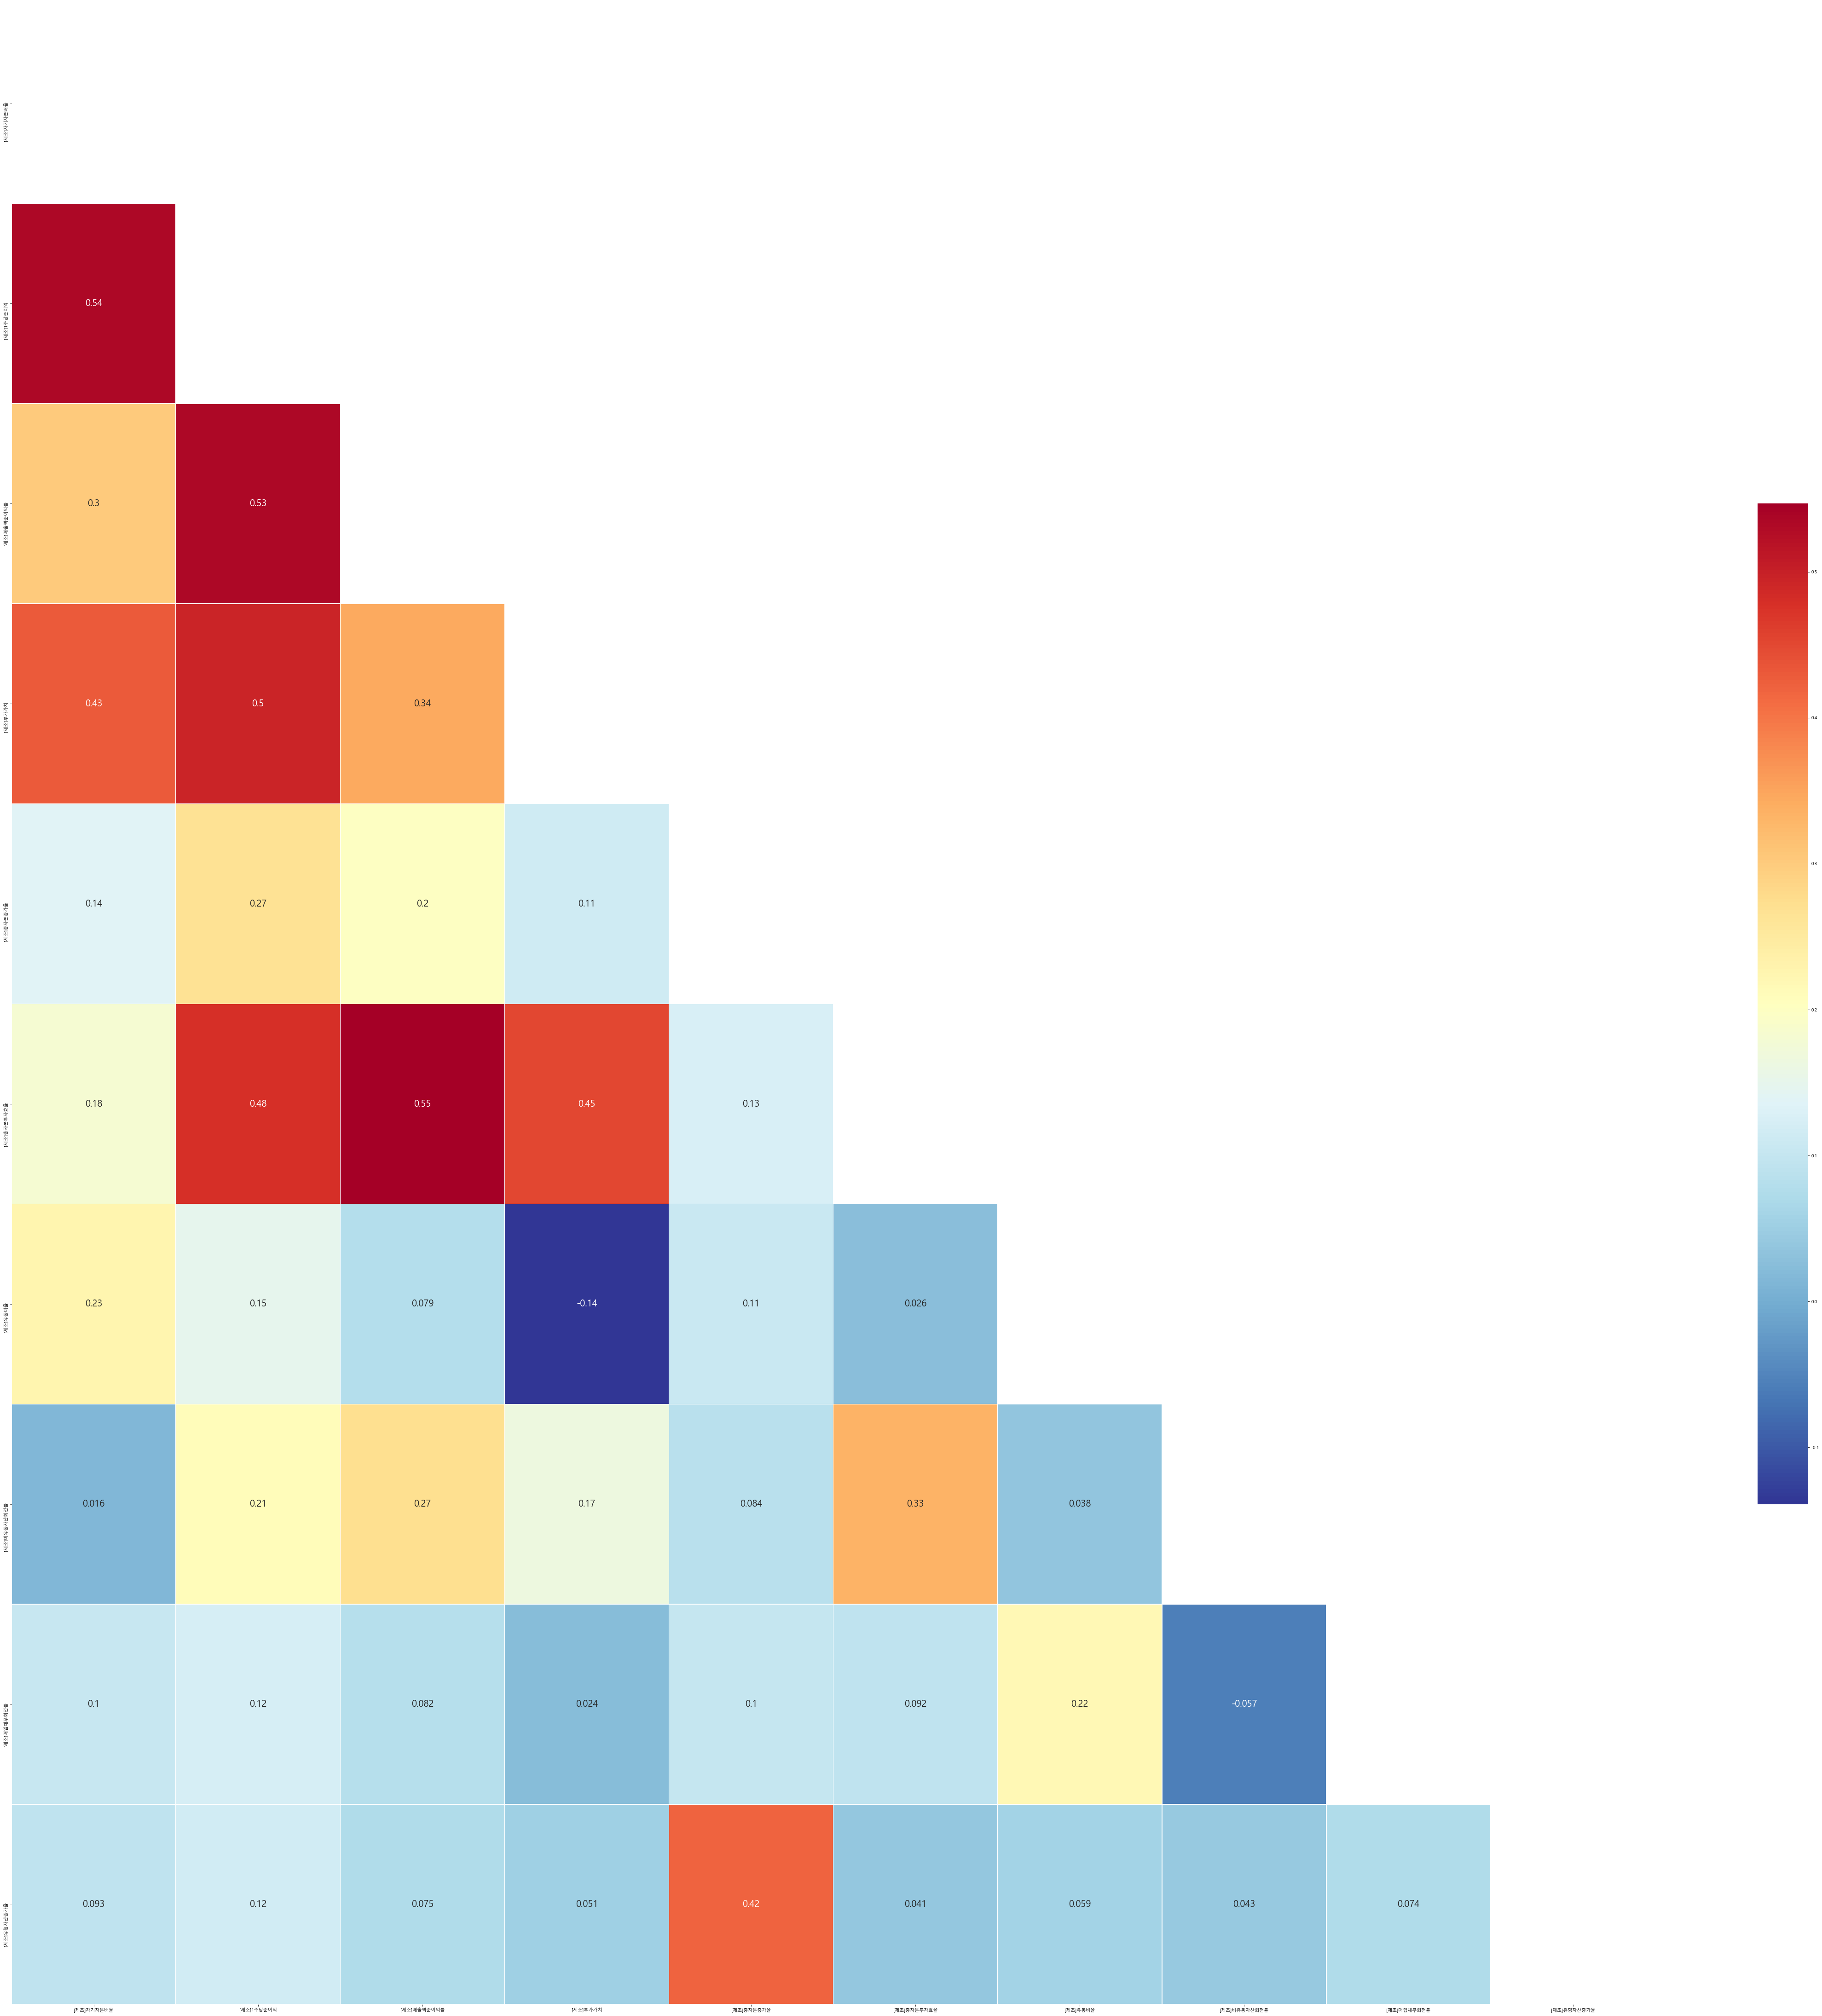

In [120]:
import numpy as np
def corr_heatmap(dataset, method_option = 'pearson'):

    
    # heatmap 그리기
    mask_ut=np.triu(np.ones(dataset.corr().shape)).astype(bool) 
    plt.figure(figsize=(80,80))
    sns.heatmap(dataset.corr(method=method_option), annot = True, cmap = 'RdYlBu_r', cbar_kws={"shrink": .5}, 
                annot_kws={"size": 20}, linewidths=.5, mask=mask_ut)
    plt.show()

# 함수 사용
corr_heatmap(df_hetero_feature)

### 피처별 범주 분류

In [ ]:
bartlett['범주']=''

In [ ]:
bartlett['범주'][[38,39,40,41,42,44,45]] = '생산성'

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27280\3652136885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bartlett['범주'][[38,39,40,41,42,44,45]] = '생산성'


KeyError: '[38 39 40 41 42 44 45] not in index'

In [ ]:
bartlett = bartlett.drop(48)
bartlett

,피처값,F-test,분산,T-test,범주
0,[제조]매출액증가율,8.096743e-08,hetero,0.000452,성장성
2,[제조]비유동자산증가율,3.487216e-01,homo,0.0,성장성
3,[제조]총자본증가율,1.864021e-01,homo,0.0,성장성
4,[제조]자기자본증가율,1.071900e-14,hetero,0.000008,성장성
5,[제조]유동자산증가율,1.701051e-04,hetero,0.000015,성장성
7,[제조]재고자산증가율,1.335022e-05,hetero,0.0,성장성
8,[제조]매출액총이익률,1.261631e-04,hetero,0.0,수익성
9,[제조]매출액순이익률,1.070479e-80,hetero,0.0,수익성
10,[제조]총자본사업이익률,5.545513e-18,hetero,0.0,수익성
11,[제조]총자본순이익률,4.036610e-45,hetero,0.0,수익성


In [ ]:
Grow_bartlett = bartlett[bartlett['범주']=='성장성']
Profit_bartlett = bartlett[bartlett['범주']=='수익성']
Activity_bartlett = bartlett[bartlett['범주']=='활동성']
Stability_bartlett = bartlett[bartlett['범주']=='안정성']
Productivity_bartlett = bartlett[bartlett['범주']=='생산성']

### 범주별 피처

In [ ]:
Grow_bartlett

,피처값,F-test,분산,T-test,범주
0,[제조]매출액증가율,8.096743e-08,hetero,0.000452,성장성
2,[제조]비유동자산증가율,3.487216e-01,homo,0.0,성장성
3,[제조]총자본증가율,1.864021e-01,homo,0.0,성장성
4,[제조]자기자본증가율,1.071900e-14,hetero,0.000008,성장성
5,[제조]유동자산증가율,1.701051e-04,hetero,0.000015,성장성
7,[제조]재고자산증가율,1.335022e-05,hetero,0.0,성장성


In [ ]:
Profit_bartlett

,피처값,F-test,분산,T-test,범주
8,[제조]매출액총이익률,1.261631e-04,hetero,0.0,수익성
9,[제조]매출액순이익률,1.070479e-80,hetero,0.0,수익성
10,[제조]총자본사업이익률,5.545513e-18,hetero,0.0,수익성
11,[제조]총자본순이익률,4.036610e-45,hetero,0.0,수익성
12,[제조]자기자본순이익률,1.878436e-87,hetero,0.0,수익성
13,[제조]1주당순이익,6.309810e-02,homo,0.0,수익성
14,[제조]1주당매출액,5.874191e-12,hetero,0.0,수익성


In [ ]:
Activity_bartlett

,피처값,F-test,분산,T-test,범주
15,[제조]총자본회전률,1.382090e-01,homo,0.0,활동성
17,[제조]비유동자산회전률,2.322028e-07,hetero,0.0,활동성
20,[제조]매입채무회전률,6.612722e-94,hetero,0.0,활동성
21,[제조]매입채무회전기간,6.893020e-27,hetero,0.0,활동성
23,[제조]매출채권회전기간,1.320025e-21,hetero,0.000327,활동성
26,[제조]순운전자본회전률,6.821750e-02,homo,0.0,활동성
27,[제조]유동자산회전률,9.444850e-01,homo,0.00154,활동성
28,[제조]당좌자산회전률,2.660212e-01,homo,0.001091,활동성


In [ ]:
Stability_bartlett

,피처값,F-test,분산,T-test,범주
29,[제조]유동비율,4.549235e-09,hetero,0.0,안정성
30,[제조]당좌비율,1.398865e-08,hetero,0.0,안정성
31,[제조]현금비율,7.499112e-08,hetero,0.0,안정성
32,[제조]부채비율,1.765822e-97,hetero,0.0,안정성
33,[제조]순운전자본비율,1.733802e-03,hetero,0.0,안정성
34,[제조]자기자본배율,6.538218e-33,hetero,0.0,안정성
35,[제조]비유동비율,1.125987e-72,hetero,0.0,안정성
36,[제조]유동자산구성비율,1.227852e-01,homo,0.000042,안정성
37,[제조]자기자본구성비율,1.399577e-05,hetero,0.0,안정성
47,[제조]이자보상배율(이자비용),8.892149e-22,hetero,0.000614,안정성


In [ ]:
Productivity_bartlett

,피처값,F-test,분산,T-test,범주
38,[제조]부가가치,7.452751e-04,hetero,0.0,생산성
39,[제조]총자본투자효율,6.512239e-40,hetero,0.0,생산성
40,[제조]설비투자효율,1.340890e-01,homo,0.0,생산성
41,[제조]기계투자효율,2.207324e-156,hetero,0.0,생산성
42,[제조]부가가치율,1.246357e-87,hetero,0.0,생산성
44,[제조]자본분배율,9.919202e-16,hetero,0.00034,생산성
45,[제조]이윤분배율,1.149550e-18,hetero,0.00307,생산성
